# Demonstrate using regionmask to make a N. Africa region based on AR6 and countries 


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import regionmask

import cartopy.crs as ccrs


In [3]:
def sample_data(shape=(73, 145)):
    """Returns ``lons``, ``lats`` and ``data`` of some fake data."""
    nlats, nlons = shape
    lats1 = np.linspace(-np.pi / 2, np.pi / 2, nlats)
    lons1 = np.linspace(0, 2 * np.pi, nlons)[0:-1]
    lons, lats = np.meshgrid(lons1, lats1)
    wave = 0.75 * (np.sin(3 * lats) ** 8) * np.cos(4 * lons)
    mean = 0.5 * np.cos(2 * lats) * ((np.sin(2 * lats)) ** 2 + 2)

    lats1 = np.rad2deg(lats1)
    lons1 = np.rad2deg(lons1)
    data = wave + mean

    return lons1, lats1, data

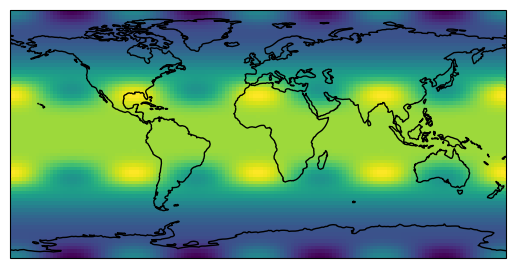

In [4]:
# plot some global sample data
x, y, Z = sample_data()

#X, Y = np.meshgrid(x, y)
#Z = f(X, Y)

da = xr.DataArray(Z, coords = {"lon":x, "lat":y}, dims=["lat", "lon"])

ax = plt.axes(projection=ccrs.PlateCarree())

ax.pcolormesh(da.lon, da.lat, da)
ax.coastlines()



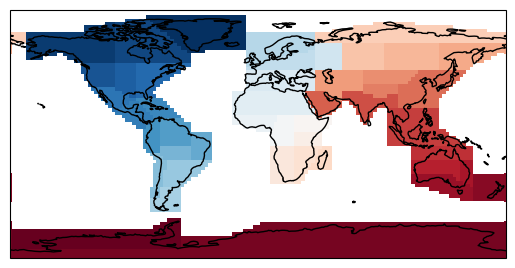

In [5]:
# plot the AR6 regions 
mask = regionmask.defined_regions.ar6.land.mask(da, wrap_lon=True)
ax = plt.axes(projection=ccrs.PlateCarree())
low = mask.min()
high = mask.max()

levels = np.arange(low - 0.5, high + 1)

mask.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), levels=levels, add_colorbar=False)

ax.coastlines()

In [7]:
# find index of the Sahara region

sah_key = regionmask.defined_regions.ar6.all.map_keys('Sahara')
sah_key

np.int64(20)

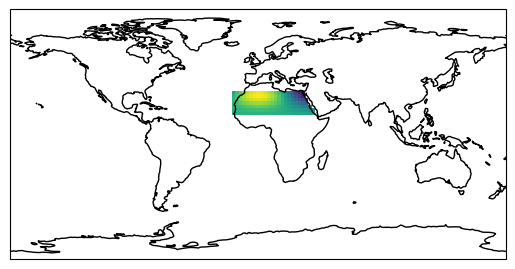

In [8]:
# mask to this region
da_sah = da.where(mask == sah_key)
ax = plt.axes(projection=ccrs.PlateCarree())

ax.pcolormesh(da_sah.lon, da_sah.lat, da_sah)
ax.coastlines()

## Now use countries

SHA256 hash of downloaded file: c07cff53ff08cd0edbdf428c17e1f1b96306c963ec9fb25c8928b2813a2e0d5d
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
Unzipping contents of '/home/mohamed/.cache/regionmask/natural_earth/v5.0.0/ne_110m_admin_0_countries.zip' to '/home/mohamed/.cache/regionmask/natural_earth/v5.0.0/ne_110m_admin_0_countries'


<GeoAxes: >

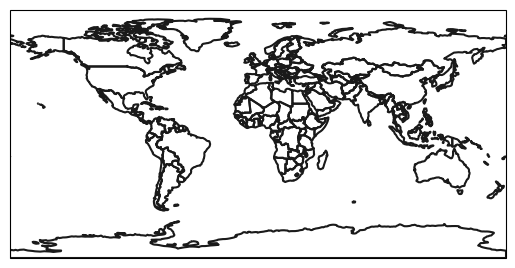

In [9]:
# plot countries
regionmask.defined_regions.natural_earth_v5_0_0.countries_110.plot(add_label=False)

In [10]:
countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_110

In [11]:
eg_key = countries.map_keys('Egypt')
eg_key

np.int64(163)

In [20]:
# this doesn't work - the mask is a shape not a raster
#da_eg = da.where(countries == eg_key)
mask = countries.mask(x, y, wrap_lon=True)
da_eg = da.where(mask == eg_key)

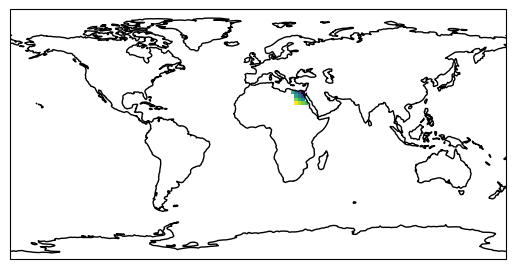

In [13]:
ax = plt.axes(projection=ccrs.PlateCarree())

ax.pcolormesh(da_eg.lon, da_eg.lat, da_eg)
ax.coastlines()

In [14]:
# Now multiple countries
NA_country_names = ['Algeria','Egypt','Libya','Mauritania','Morocco','Tunisia']
# make a list of indices for all these countries
na_indices =[countries.map_keys(name) for name in NA_country_names]
na_indices

[np.int64(82),
 np.int64(163),
 np.int64(164),
 np.int64(53),
 np.int64(162),
 np.int64(81)]

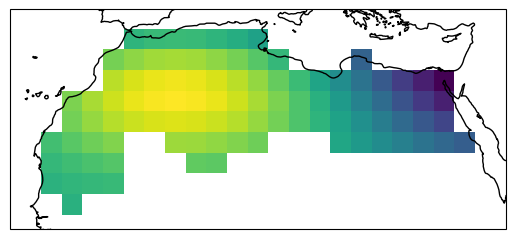

In [15]:
da_na = da.where(np.isin(mask.data,na_indices))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.pcolormesh(da_na.lon, da_na.lat, da_na)
ax.coastlines()
# zoom map in 
ax.set_extent([-20,40,12,35])